# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: Erisa Kohansal 28708160

Student 2: Hadrien GRIFFAIS 28724543

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

K2 = np.arange(24)
print(K2.reshape((4,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('img/image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

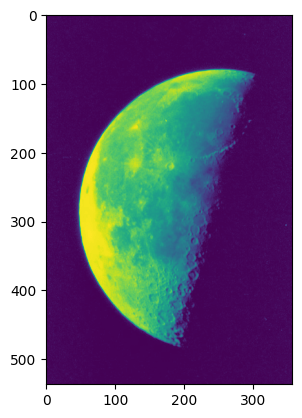

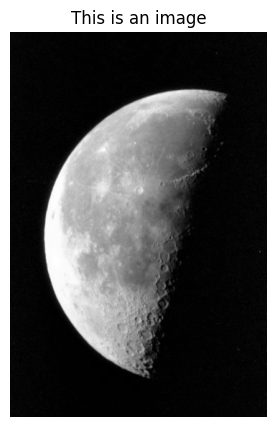

In [12]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [13]:
from PIL import Image
import numpy as np
import copy

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    image = np.array(Image.open(fname))
    return image

openImage("img/moon.png")

array([[ 1,  3,  7, ...,  8, 16,  8],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  8,  8, ...,  6,  4,  8],
       [ 4,  8,  8, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    # Avec boucle
    cpt = 0
    for i in range(len(I)):
        for j in range(len(I[i])):
            if (k == I[i][j]):
                cpt += 1
    return cpt  

def countPixels2(I, k):
    """ Sans boucle """
    return np.where(I == k, 1, 0).sum()

print(countPixels(myimage, 4))  
print(countPixels2(myimage, 4))          

17167
17167


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[  1   3   7 ...   8  16   8]
 [  3   7   3 ... 255  11  12]
 [  6 255   6 ...   7   2   3]
 ...
 [255   8   8 ...   6 255   8]
 [255   8   8 ... 255   6   6]
 [  2   3   3 ...   6   9   9]]


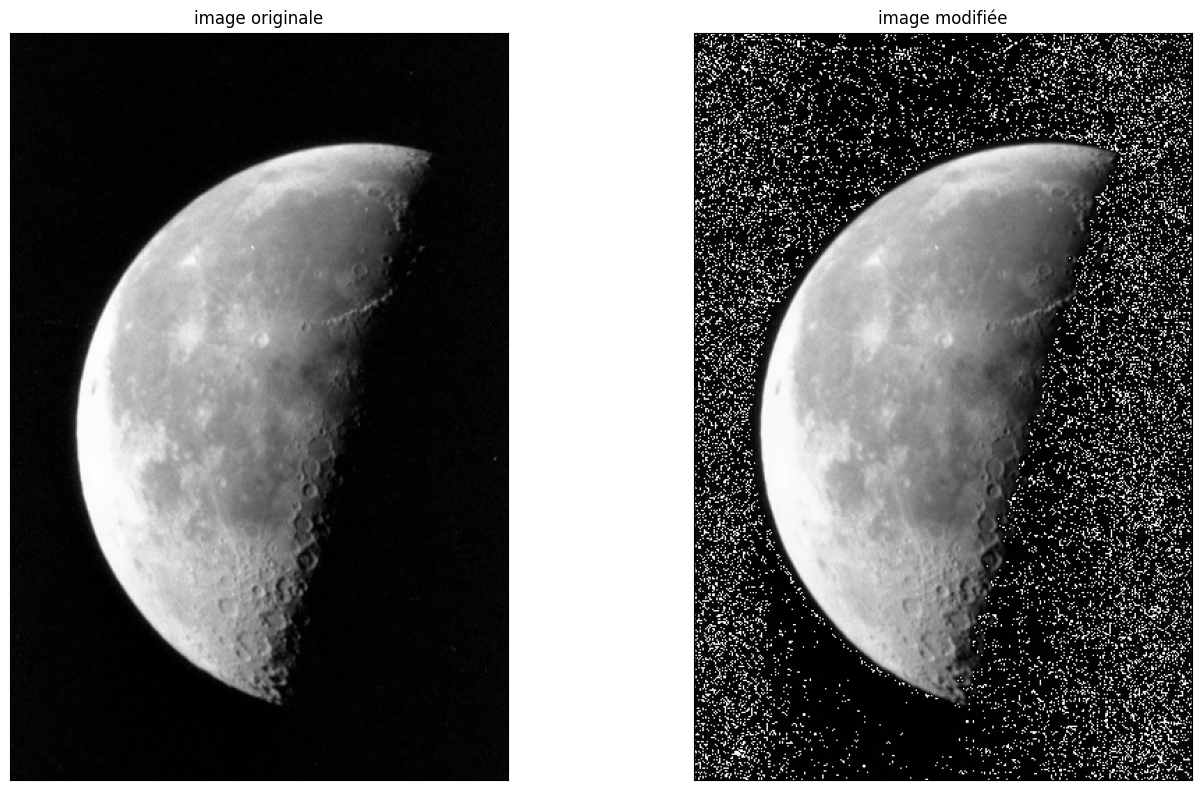

In [15]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    I_prime = copy.deepcopy(I)
    for i in range(len(I)):
        for j in range(len(I[i])):
            if (I[i][j] == k1):
                I_prime[i][j] = k2
    return I_prime

def replacePixels2(I, k1, k2):
    """ Sans boucle """
    return np.where(I == k1, k2, I)
 
print(replacePixels(myimage, 4, 255) == replacePixels2(myimage, 4, 255))  
img = replacePixels2(myimage, 4, 255)
print(replacePixels2(myimage, 4, 255))     

fig = plt.figure(figsize=(15, 8))
sub1 = plt.subplot(1, 2, 1)
sub1.imshow(myimage, cmap="gray")
sub1.set_title("image originale")
sub1.set_xticks(())
sub1.set_yticks(())

sub2 = plt.subplot(1, 2, 2)
sub2.imshow(img, cmap="gray")
sub2.set_title("image modifiée")
sub2.set_xticks(())
sub2.set_yticks(())

fig.tight_layout()
plt.show()

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[2.38735178 3.16205534 4.71146245 ... 5.09881423 8.19762846 5.09881423]
 [3.16205534 4.71146245 3.16205534 ... 3.54940711 6.26086957 6.64822134]
 [4.32411067 3.54940711 4.32411067 ... 4.71146245 2.77470356 3.16205534]
 ...
 [3.54940711 5.09881423 5.09881423 ... 4.32411067 3.54940711 5.09881423]
 [3.54940711 5.09881423 5.09881423 ... 3.54940711 4.32411067 4.32411067]
 [2.77470356 3.16205534 3.16205534 ... 4.32411067 5.48616601 5.48616601]]


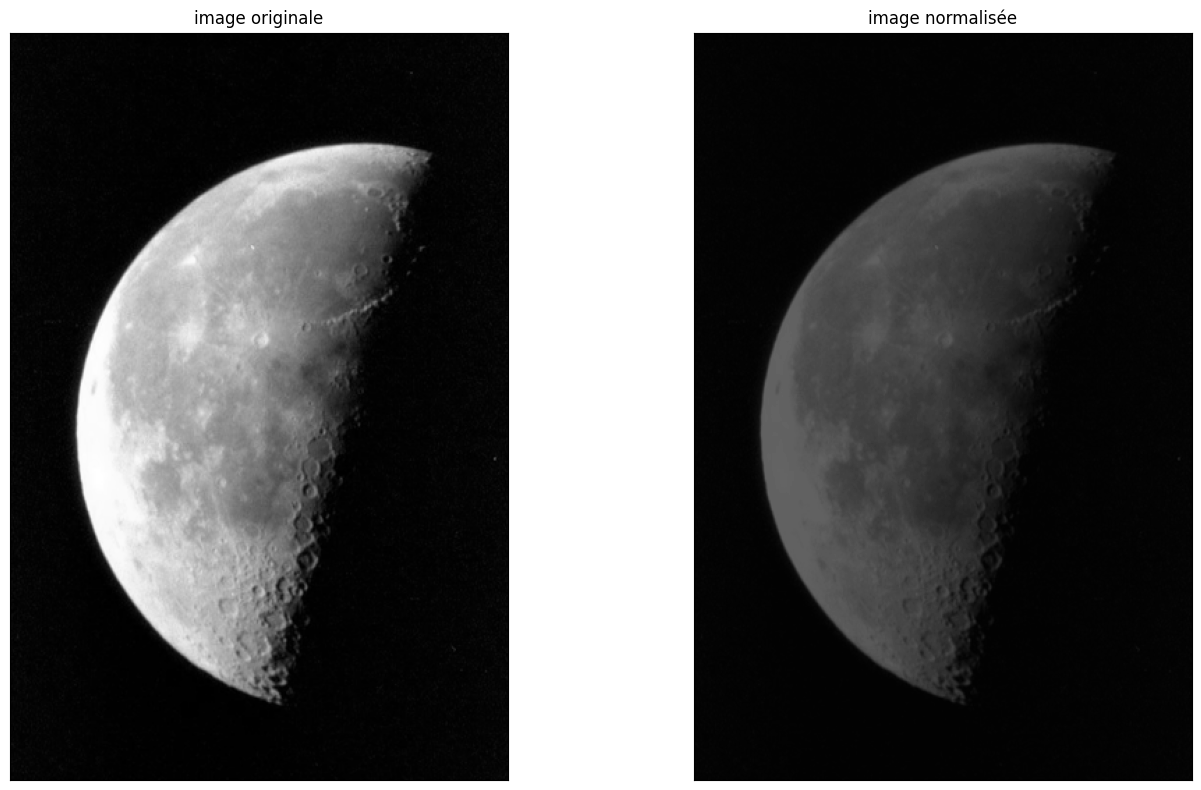

In [16]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    I_prime = np.zeros(I.shape)
    for i in range(len(I)):
        for j in range(len(I[i])):
            I_prime[i][j] = ( ( (I[i][j]-np.min(I)) / (np.max(I)-np.min(I)) ) * (k2-k1) ) + k1
    return I_prime

def normalizeImage2(I, k1, k2):
    """ Sans boucle """
    return (I - I.min()) / (I.max() - I.min()) * (k2-k1) + k1

print(normalizeImage(myimage, 2, 100) == normalizeImage2(myimage, 2, 100)) 
img = normalizeImage2(myimage, 2, 100)
print(img)  

fig = plt.figure(figsize=(15, 8))
sub1 = plt.subplot(1, 2, 1)
sub1.imshow(myimage, cmap="gray")
sub1.set_title("image originale")
sub1.set_xticks(())
sub1.set_yticks(())

sub2 = plt.subplot(1, 2, 2)
sub2.imshow(img, vmin=0, vmax=255, cmap="gray")
sub2.set_title("image normalisée")
sub2.set_xticks(())
sub2.set_yticks(())

fig.tight_layout()
plt.show()

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[254 252 248 ... 247 239 247]
 [252 248 252 ... 251 244 243]
 [249 251 249 ... 248 253 252]
 ...
 [251 247 247 ... 249 251 247]
 [251 247 247 ... 251 249 249]
 [253 252 252 ... 249 246 246]]


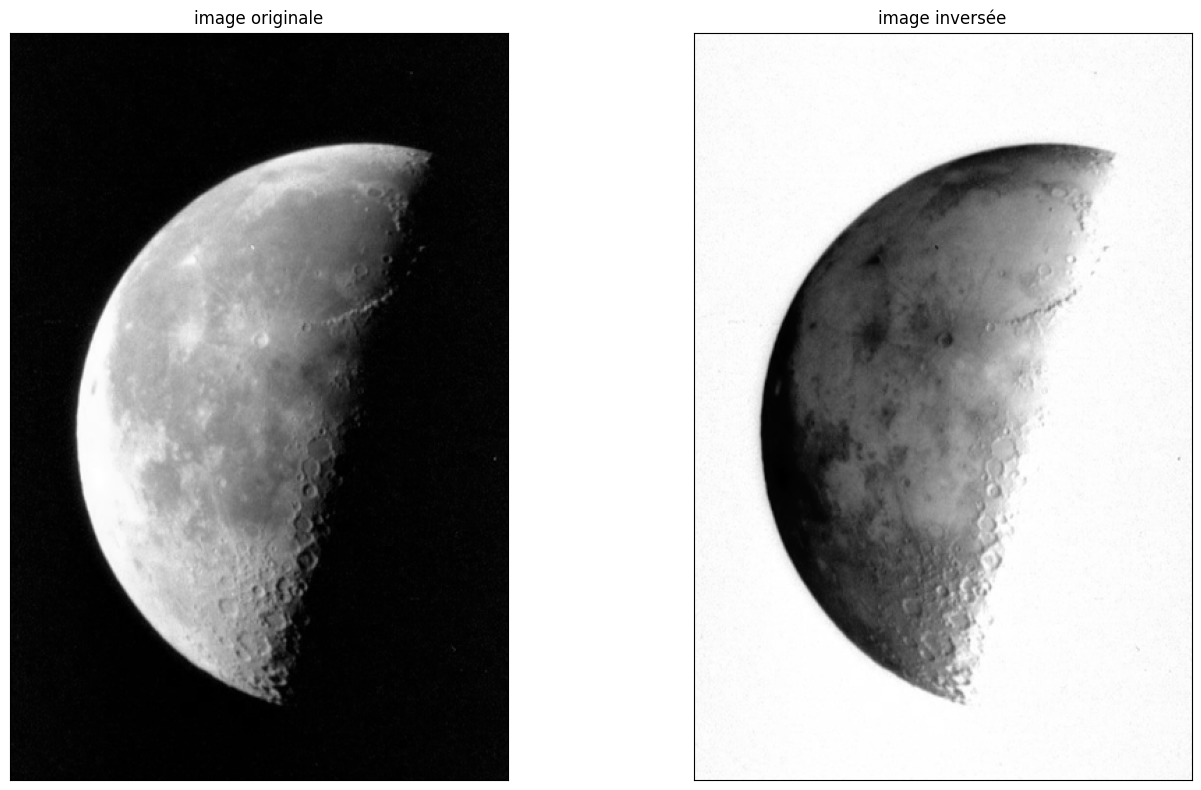

In [17]:
def inverteImage(I):
    """ Array -> Array """
    I_prime = copy.deepcopy(I)
    for i in range(len(I)):
        for j in range(len(I[i])):
            I_prime[i][j] = 255 - I[i][j]
    return I_prime

def inverteImage2(I):
    """ Sans boucle """
    return 255 - I

print(inverteImage(myimage) == inverteImage2(myimage))
img = inverteImage2(myimage)
print(img)

fig = plt.figure(figsize=(15, 8))
sub1 = plt.subplot(1, 2, 1)
sub1.imshow(myimage, cmap="gray")
sub1.set_title("image originale")
sub1.set_xticks(())
sub1.set_yticks(())

sub2 = plt.subplot(1, 2, 2)
sub2.imshow(img, cmap="gray")
sub2.set_title("image inversée")
sub2.set_xticks(())
sub2.set_yticks(())

fig.tight_layout()
plt.show()

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

[ 1459 20126 30924 25408 17167 11368  7369  4767  3213  2178  1486   993
   632   488   371   301   255   217   201   202   190   165   168   140
   160   157   129   136   140   135   137   121   137   114   127   129
   115   132   123   124   101    91   122   116   129   109   108   116
   113   123   109   140   101   109   114   117   140   127   140   142
   129   134   192   160   179   165   170   154   155   159   164   184
   166   180   169   132   153   171   165   156   166   142   151   179
   159   154   167   166   179   163   195   198   181   216   230   231
   250   256   264   291   245   242   279   247   261   304   287   286
   296   286   292   296   285   312   274   312   282   308   296   267
   273   304   327   263   286   282   272   246   238   227   243   225
   239   233   242   248   258   262   263   309   338   336   324   318
   335   326   327   316   314   293   313   328   292   300   296   326
   341   312   336   326   362   357   384   382   

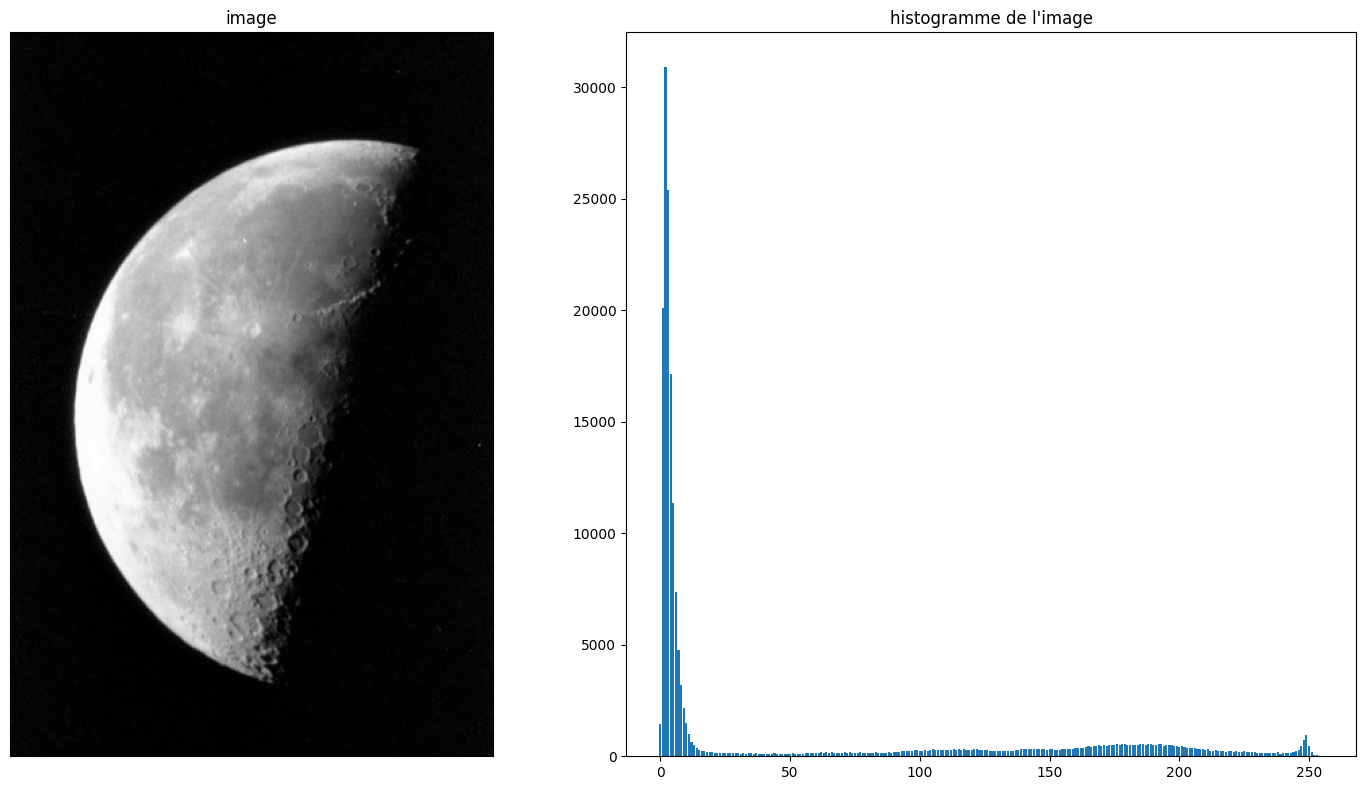

In [18]:
def computeHistogram(I):
    """ Array -> list[int] """
    Tab_hist = np.zeros(256, dtype=int)
    for i in np.unique(I):
        Tab_hist[int(i)] = int(countPixels2(I, i))
    return Tab_hist

hist = computeHistogram(myimage)
print(hist)

fig = plt.figure(figsize=(15, 8))
sub1 = plt.subplot(1, 2, 1)
sub1.imshow(myimage, cmap="gray")
sub1.set_title("image")
sub1.set_xticks(())
sub1.set_yticks(())

sub2 = plt.subplot(1, 2, 2)
sub2.bar(range(len(hist)), hist)
sub2.set_title("histogramme de l'image")

fig.tight_layout()
plt.show()
    
# use comments to answer to a verbal question
# Il est possible de calculer l'histogramme sans 
# utiliser explicitement les valeurs des pixels.
# C'est ce que nous avons fait dans la fonction computeHistogram. 
# Nous récupérons toutes les valeurs uniques des pixels de 
# l'image et nous comptons le nombre de pixels dans l'image ayant 
# cette valeur.

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[  0   0 255 ... 255 255 255]
 [  0 255   0 ... 255 255 255]
 [255 255 255 ... 255   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


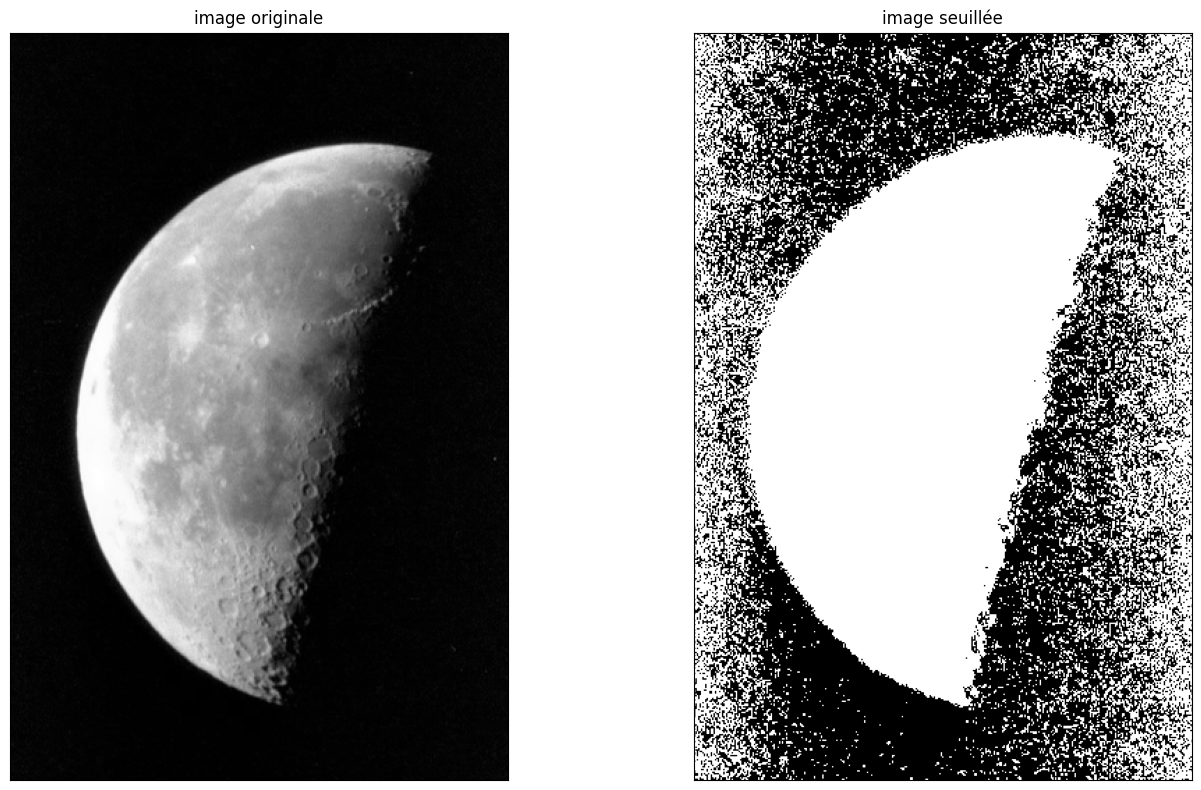

In [19]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    I_prime = np.zeros(I.shape, dtype=int)
    for i in range(len(I)):
        for j in range(len(I[i])):
            if I[i][j] > s:
                I_prime[i][j] = 255
    return I_prime

def thresholdImage2(I, s):
    """ Sans boucle """
    return np.where(I <= s, 0, 255)

print(thresholdImage(myimage, 3) == thresholdImage2(myimage, 3))
img = thresholdImage2(myimage, 3)
print(img)

fig = plt.figure(figsize=(15, 8))
sub1 = plt.subplot(1, 2, 1)
sub1.imshow(myimage, cmap="gray")
sub1.set_title("image originale")
sub1.set_xticks(())
sub1.set_yticks(())

sub2 = plt.subplot(1, 2, 2)
sub2.imshow(img, cmap="gray")
sub2.set_title("image seuillée")
sub2.set_xticks(())
sub2.set_yticks(())

fig.tight_layout()
plt.show()


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

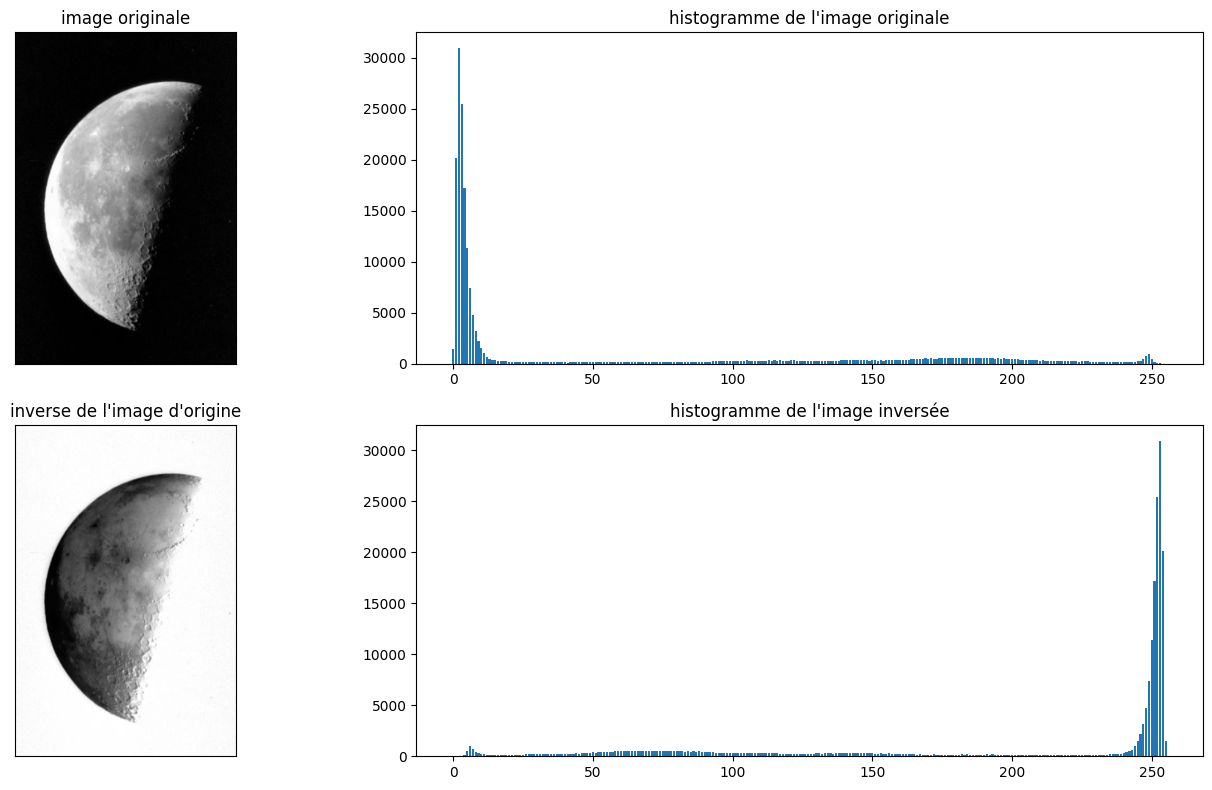

In [20]:
import matplotlib.pyplot as plt

## your code start below
# exemples des subplot : https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# lis l'image
image = openImage("img/moon.png")

# affiche l'image
ax[0, 0].imshow(image, cmap="gray")
ax[0, 0].set_title("image originale")
ax[0, 0].set_xticks(())
ax[0, 0].set_yticks(())

# calcul et affiche l'histogramme
hist = computeHistogram(image)
ax[0, 1].bar(range(len(hist)), hist)
ax[0, 1].set_title("histogramme de l'image originale")

# calcul l'inverse de l'image et l'affiche
inv_image = inverteImage(image)
ax[1, 0].imshow(inv_image, cmap="gray")
ax[1, 0].set_title("inverse de l'image d'origine")
ax[1, 0].set_xticks(())
ax[1, 0].set_yticks(())

# calcul et affiche l'histogramme de l'inverse de l'image
inv_hist = computeHistogram(inv_image)
ax[1, 1].bar(range(len(inv_hist)), inv_hist)
ax[1, 1].set_title("histogramme de l'image inversée")

fig.tight_layout()
plt.show()

# On observe que les deux histogrammes sont exactement
# l'inverse de l'un et l'autre et que l'image obtenue est en effet
# l'inverse de l'image d'origine.

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

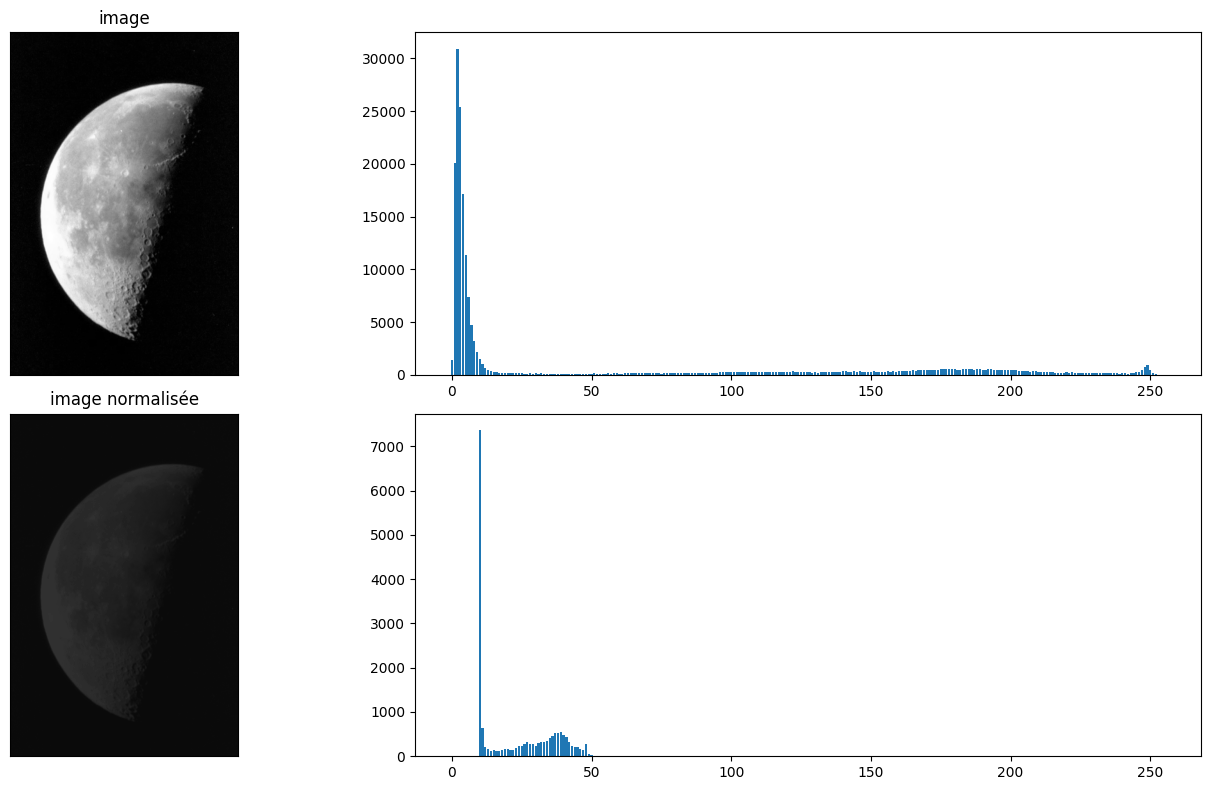

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# lis et affiche l'image
image = openImage("img/moon.png")
ax[0, 0].imshow(image, cmap="gray")
ax[0, 0].set_title("image")
ax[0, 0].set_xticks(())
ax[0, 0].set_yticks(())

# calcul et affiche l'histogramme 
hist = computeHistogram(image)
ax[0, 1].bar(range(len(hist)), hist)

# normalise l'image à l'intervalle [10, 50]
n_image = normalizeImage2(image, 10, 50)
ax[1, 0].imshow(n_image, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("image normalisée")
ax[1, 0].set_xticks(())
ax[1, 0].set_yticks(())

# calcul et affiche l'histogramme de l'image normalisée 
n_hist = computeHistogram(n_image)
ax[1, 1].bar(range(len(n_hist)), n_hist)

fig.tight_layout()
plt.show()

# Les résultats : Sur l'histogramme associé à l'image 
# normalisée, on observe que les valeurs des pixels sont 
# bien concentrées dans l'intervalle [10, 50], tandis que 
# les autres valeurs en dehors de cet intervalle valent 
# maintenant 0, ce qui correspond à l'objectif recherché. 
# Il y a deux pics distincts sur l'histogramme de l'image 
# avant la normalisation. Le premier est situé proche de 
# 0, ce qui correspond à la couleur noire présente dans 
# l'arrière-plan de l'image. L'autre est moins intense que 
# le premier pic, et il représente la couleur blanche de 
# la lune (situé proche de la valeur 255). Sur l'histogramme 
# de l'image normalisée, ces deux pics sont maintenant placés 
# à des positions différentes : l'un proche de 10 et l'autre 
# proche de 50, ce qui explique que l'image normalisée est 
# effectivement plus sombre. 
# Nous avons réduit la dynamique de l'image ainsi que son 
# contraste en la normalisant.


10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

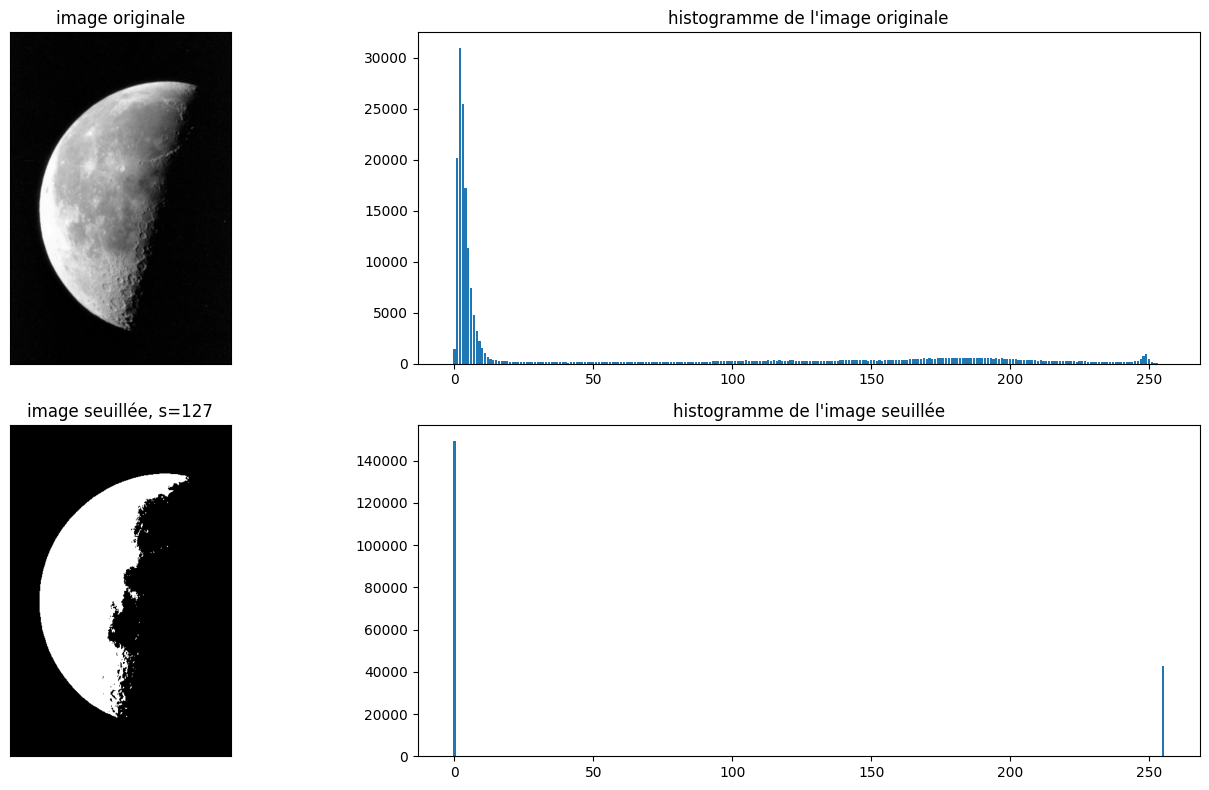

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# lis l'image et l'affiche
image = openImage("img/moon.png")
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_xticks(())
ax[0, 0].set_yticks(())
ax[0, 0].set_title("image originale")

# calcul et affiche l'histogramme de l'image 
hist = computeHistogram(image)
ax[0, 1].bar(range(len(hist)), hist)
ax[0, 1].set_title("histogramme de l'image originale")

# obtient  et affiche l'image seuillée 
t_image = thresholdImage2(image, 127)
ax[1, 0].imshow(t_image, cmap='gray')
ax[1, 0].set_xticks(())
ax[1, 0].set_yticks(())
ax[1, 0].set_title("image seuillée, s=127")

# calcul et affiche l'histogramme de l'image seuillée
t_hist = computeHistogram(t_image)
ax[1, 1].bar(range(len(t_hist)), t_hist)
ax[1, 1].set_title("histogramme de l'image seuillée")

fig.tight_layout()
plt.show()

# L'image seuillée n'a que deux intensités 
# d'après son histogramme (0 et 255), ce qui 
# correspond parfaitement au résultat recherché. 
# Les bords de la lune sont distincts et bien définis, 
# indiquant que la valeur du seuil a été judicieusement 
# choisie pour faire ressortir la forme de la lune tout 
# en éliminant les détails indésirables de l'arrière-plan. 
# Ce processus simplifie l'image, en mettant en évidence 
# les éléments essentiels, tout en améliorant la lisibilité 
# globale et la précision de la segmentation.

## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 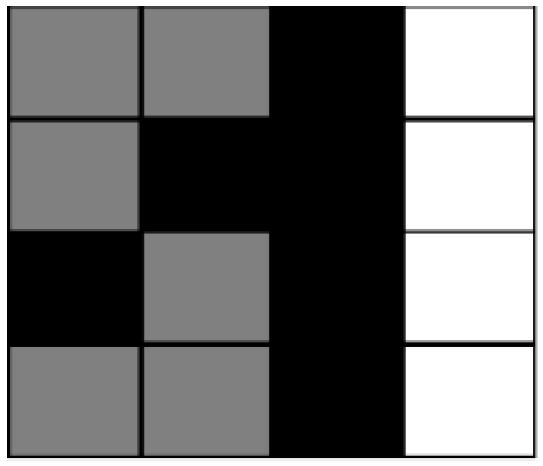 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

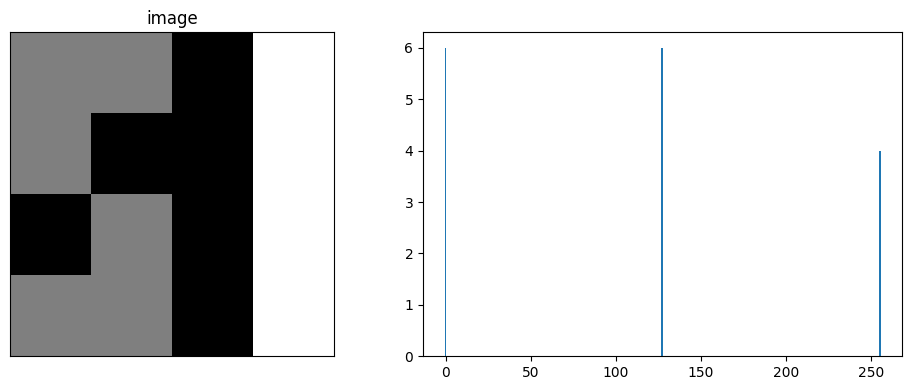

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

I = np.array([[127,127,0,255],
             [127,0,0,255],
             [0,127,0,255],
             [127,127,0,255]])

ax[0].imshow(I, cmap="gray")
ax[0].set_title("image")
ax[0].set_xticks(())
ax[0].set_yticks(())

hist = computeHistogram(I)
ax[1].bar(range(len(hist)), hist)

fig.tight_layout()
plt.show()

# L'histogramme n'a que trois valeurs : 0, 127 et 255
# ce qui est cohérent avec les valeurs des pixels de 
# l'image.

2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1[$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

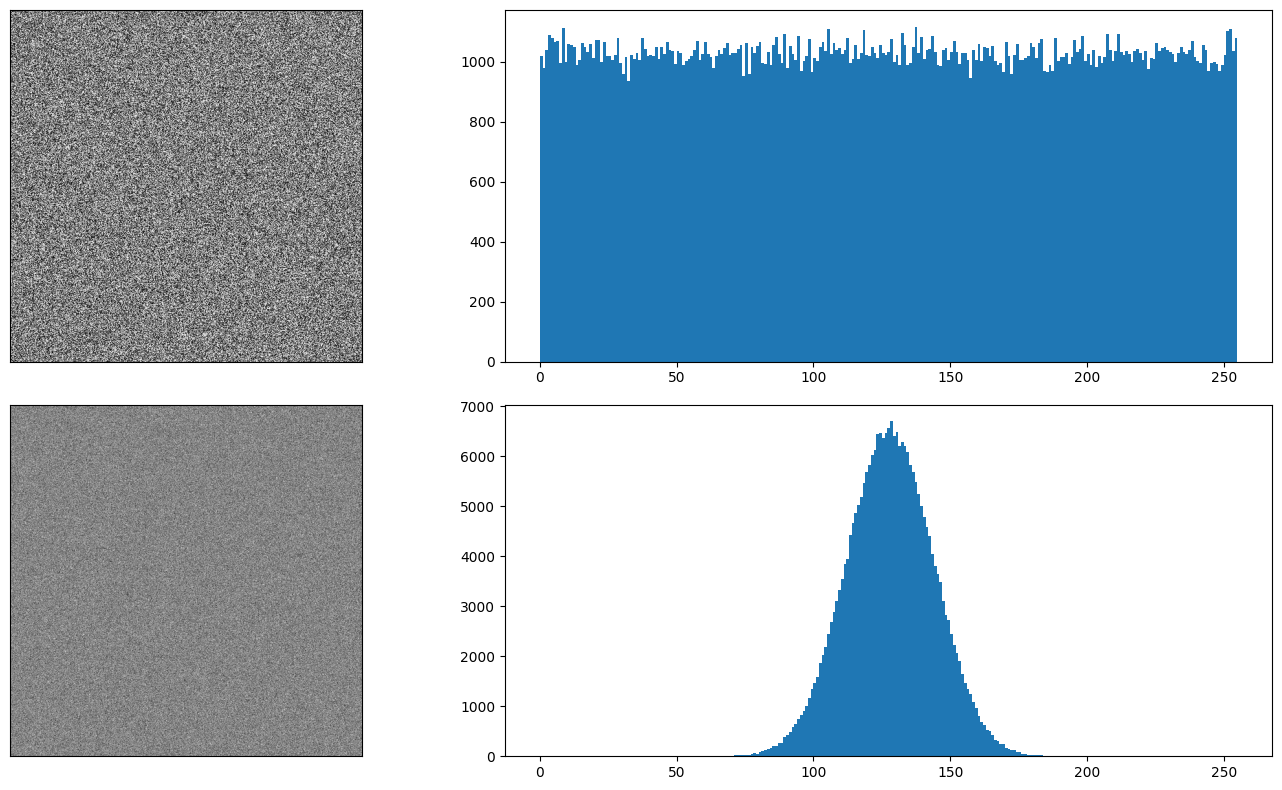

moyenne de l'image de distribution uniforme : 127.3484436935125
écart-type de l'image de distribution uniforme : 73.6474260040818
moyenne de l'image de distribution normale : 128.0237604971144
écart-type de l'image de distribution normale : 15.966361552764521


In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# uniform distribution
first = np.random.rand(512, 512)*255
ax[0, 0].imshow(first, cmap="gray")
ax[0, 0].set_title("")
ax[0, 0].set_xticks(())
ax[0, 0].set_yticks(())
ax[0, 1].hist(first.ravel(), range(256))

# gaussian distribution
second = 128 + 16 * np.random.randn(512, 512)
ax[1, 0].imshow(second, cmap="gray")
ax[1, 0].set_title("")
ax[1, 0].set_xticks(())
ax[1, 0].set_yticks(())
ax[1, 1].hist(second.ravel(), range(256))

fig.tight_layout()
plt.show()

print(f"moyenne de l'image de distribution uniforme : {first.mean()}")
print(f"écart-type de l'image de distribution uniforme : {first.std()}")

print(f"moyenne de l'image de distribution normale : {second.mean()}")
print(f"écart-type de l'image de distribution normale : {second.std()}")

# L'histogramme de l'image générée à partir de la distribution 
# gaussienne imite la forme en cloche caractéristique de la distribution 
# gaussienne, avec une concentration de pixels autour de la moyenne et des 
# intensités qui décroissent progressivement vers les extrêmes. Ce comportement 
# est typique d'une distribution normale, où la majorité des valeurs se situent 
# autour de la moyenne, avec une dispersion qui dépend de l'écart-type.
# En ce qui concerne l'histogramme de l'image représentant la loi uniforme, 
# on observe une répartition équitable des pixels sur toute la plage des 
# intensités, chaque niveau d'intensité étant représenté par un nombre quasi 
# constant de pixels. Cela reflète bien la définition d'une distribution 
# uniforme, où chaque valeur a la même probabilité d'occurrence. Cette uniformité 
# se traduit par une image où aucun niveau d'intensité n'est privilégié, créant 
# un contraste plus régulier à travers l'image. 

# De plus, on remarque que l'image générée avec une distribution gaussienne 
# est plus "lisse" en raison de la forte probabilité que les pixels aient 
# des valeurs proches de 128 (le centre de la distribution). 
# En conséquence, les transitions entre les niveaux d'intensité sont plus douces, 
# tandis que l'image issue de la distribution uniforme montre des variations plus 
# brusques, augmentant le contraste (car les probabilités d'apparition sont égales). 

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

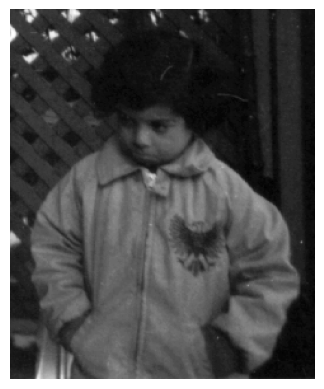

In [25]:
pout = openImage('img/pout.png')
plt.imshow(pout)
plt.gray()
plt.axis("off")
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

Les extrémités de l'histogramme : max=224 min=74


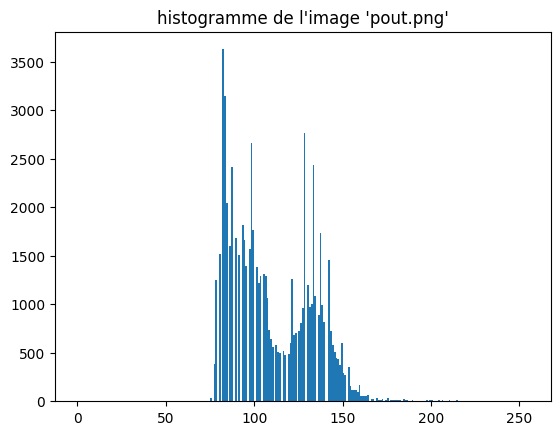

min : 74
max : 224


In [28]:
print(f"Les extrémités de l'histogramme : max={pout.max()} min={pout.min()}")
plt.hist(pout.ravel(), range(256))
plt.title("histogramme de l'image 'pout.png'")
plt.show()

print(f"min : {np.min(pout)}")
print(f"max : {np.max(pout)}")
# Il n'y a pas beaucoup de nuances dans l'image, 
# du fait des valeurs min et max qui ne sont pas 
# respectivement 0 et 255.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

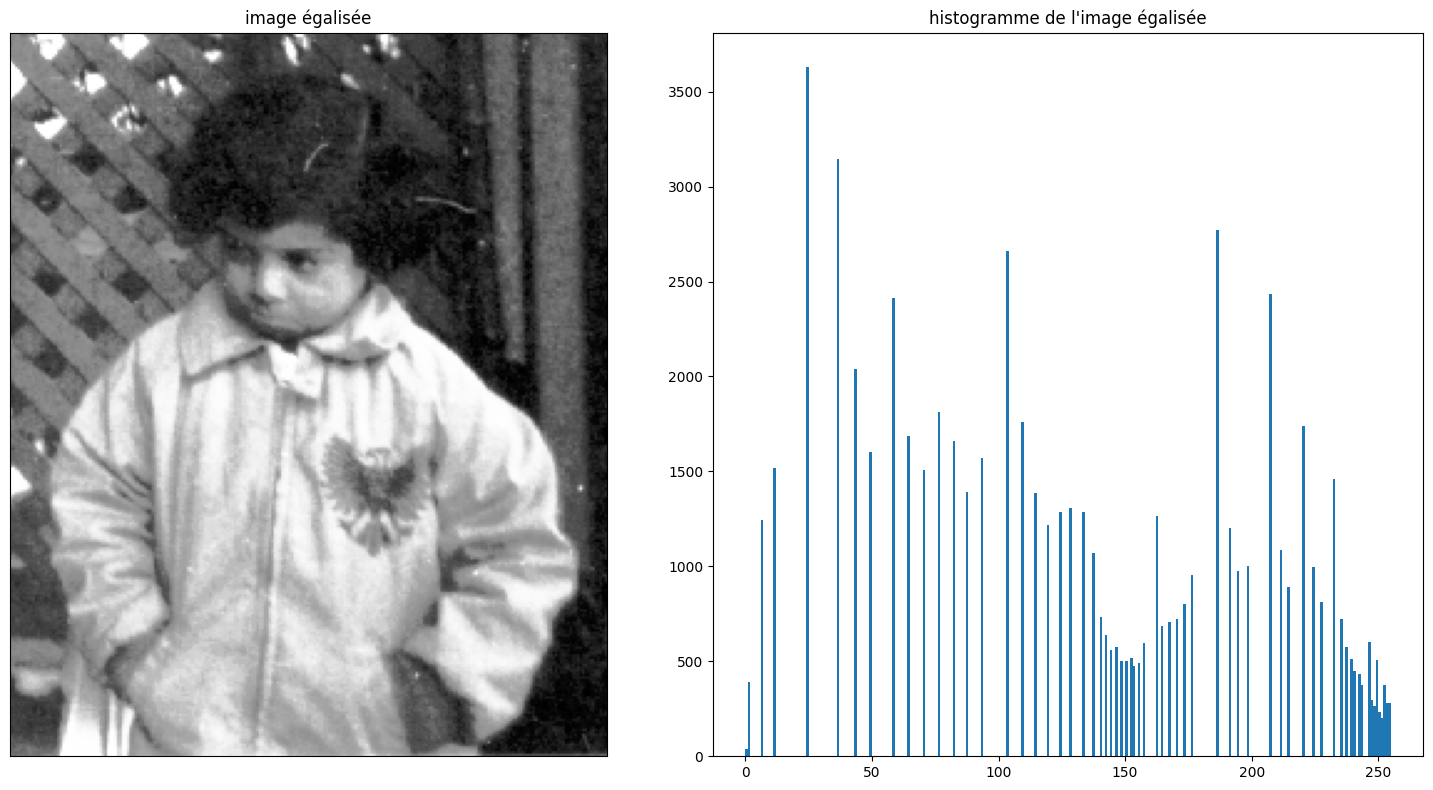

In [27]:
import copy 

def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    Hc = np.cumsum(h, dtype=int)
    L = 256
    N, M = I.shape
    return ((L - 1) * Hc[I] / (N * M))

img = histogramEqualization(pout, computeHistogram(pout))

fig = plt.figure(figsize=(15, 8))
sub1 = plt.subplot(1, 2, 1)
sub1.imshow(img, cmap="gray")
sub1.set_title("image égalisée")
sub1.set_xticks(())
sub1.set_yticks(())

sub2 = plt.subplot(1, 2, 2)
sub2.hist(img.ravel(), range(256))
sub2.set_title("histogramme de l'image égalisée")

fig.tight_layout()
plt.show()

# L'image égalisée est devenue beaucoup plus éclairée 
# que l'image d'origine. On peut observer dans son 
# histogramme qu'en effet, les valeurs sont étirées 
# le long de l'intervalle 0-255, ce qui n'était pas 
# le cas de l'image d'origine, avec des valeurs d'intensité 
# qui étaient réparties entre 74 et 224. Cette égalisation 
# permet d'améliorer le contraste global de l'image, en 
# redistribuant de manière plus uniforme les niveaux de gris. 
# Cela rend les détails plus visibles dans les zones sombres 
# et claires, offrant ainsi une meilleure visibilité des structures 
# et des objets présents dans l'image. Cette technique est 
# particulièrement utile pour les images à faible contraste, 
# où des détails importants peuvent être masqués dans des 
# plages de luminosité réduites.